In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(6804.9561)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 48


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 811.99037  validloss 1884.70680±0.00000  bestvalidloss 1884.70680  last_update 0
train: iter 1  trainloss 516.44943  validloss 1207.06611±0.00000  bestvalidloss 1207.06611  last_update 0
train: iter 2  trainloss 251.27802  validloss 816.24252±0.00000  bestvalidloss 816.24252  last_update 0
train: iter 3  trainloss -39.34919  validloss 576.29206±0.00000  bestvalidloss 576.29206  last_update 0
train: iter 4  trainloss -233.59600  validloss 1047.71888±0.00000  bestvalidloss 576.29206  last_update 1
train: iter 5  trainloss -380.13708  validloss 241.06332±0.00000  bestvalidloss 241.06332  last_update 0
train: iter 6  trainloss -432.29498  validloss 576.52685±0.00000  bestvalidloss 241.06332  last_update 1
train: iter 7  trainloss -551.00200  validloss 170.92963±0.00000  bestvalidloss 170.92963  last_update 0
train: iter 8  trainloss -680.13999  validloss 482.37117±0.00000  bestvalidloss 170.92963  last_update 1
train: iter 9  trainloss -681.32944

train: iter 76  trainloss -1383.45000  validloss -1266.10024±0.00000  bestvalidloss -1266.10024  last_update 0
train: iter 77  trainloss -1481.64525  validloss -892.68929±0.00000  bestvalidloss -1266.10024  last_update 1
train: iter 78  trainloss -1516.79499  validloss -1123.37563±0.00000  bestvalidloss -1266.10024  last_update 2
train: iter 79  trainloss -1485.45048  validloss -1043.54536±0.00000  bestvalidloss -1266.10024  last_update 3
train: iter 80  trainloss -1507.88315  validloss -1090.72210±0.00000  bestvalidloss -1266.10024  last_update 4
train: iter 81  trainloss -1486.22784  validloss -1191.99656±0.00000  bestvalidloss -1266.10024  last_update 5
train: iter 82  trainloss -1497.08965  validloss -1228.57825±0.00000  bestvalidloss -1266.10024  last_update 6
train: iter 83  trainloss -1493.02022  validloss -1239.15252±0.00000  bestvalidloss -1266.10024  last_update 7
train: iter 84  trainloss -1526.45108  validloss -1132.69709±0.00000  bestvalidloss -1266.10024  last_update 8
tr

train: iter 151  trainloss -1688.68805  validloss -954.79820±0.00000  bestvalidloss -1544.72606  last_update 11
train: iter 152  trainloss -1757.50204  validloss -1457.66289±0.00000  bestvalidloss -1544.72606  last_update 12
train: iter 153  trainloss -1747.95312  validloss -1552.83727±0.00000  bestvalidloss -1552.83727  last_update 0
train: iter 154  trainloss -1751.63857  validloss -1424.05420±0.00000  bestvalidloss -1552.83727  last_update 1
train: iter 155  trainloss -1773.81551  validloss -1580.03281±0.00000  bestvalidloss -1580.03281  last_update 0
train: iter 156  trainloss -1749.78583  validloss -1577.13195±0.00000  bestvalidloss -1580.03281  last_update 1
train: iter 157  trainloss -1745.47585  validloss -1517.39939±0.00000  bestvalidloss -1580.03281  last_update 2
train: iter 158  trainloss -1758.87463  validloss -1538.20474±0.00000  bestvalidloss -1580.03281  last_update 3
train: iter 159  trainloss -1773.11568  validloss -1519.85997±0.00000  bestvalidloss -1580.03281  last_

train: iter 224  trainloss -1869.00188  validloss -1565.22387±0.00000  bestvalidloss -1647.22370  last_update 16
train: iter 225  trainloss -1847.40459  validloss -1437.21708±0.00000  bestvalidloss -1647.22370  last_update 17
train: iter 226  trainloss -1755.89250  validloss -1306.76301±0.00000  bestvalidloss -1647.22370  last_update 18
train: iter 227  trainloss -1866.20792  validloss -1556.80643±0.00000  bestvalidloss -1647.22370  last_update 19
train: iter 228  trainloss -1683.99239  validloss -1637.41636±0.00000  bestvalidloss -1647.22370  last_update 20
train: iter 229  trainloss -1715.61657  validloss 858.45632±0.00000  bestvalidloss -1647.22370  last_update 21
train: iter 230  trainloss -1858.59643  validloss -1567.43748±0.00000  bestvalidloss -1647.22370  last_update 22
train: iter 231  trainloss -1845.97216  validloss -1581.16841±0.00000  bestvalidloss -1647.22370  last_update 23
train: iter 232  trainloss -1864.27672  validloss -1493.27715±0.00000  bestvalidloss -1647.22370  

train: iter 297  trainloss -1865.70897  validloss -1649.12667±0.00000  bestvalidloss -1656.81884  last_update 21
train: iter 298  trainloss -1878.03377  validloss -1336.66782±0.00000  bestvalidloss -1656.81884  last_update 22
train: iter 299  trainloss -1890.61904  validloss -1645.59721±0.00000  bestvalidloss -1656.81884  last_update 23
train: iter 300  trainloss -1757.25515  validloss -1403.56330±0.00000  bestvalidloss -1656.81884  last_update 24
train: iter 301  trainloss -1840.02513  validloss -1434.63659±0.00000  bestvalidloss -1656.81884  last_update 25
train: iter 302  trainloss -1910.81600  validloss -1525.70471±0.00000  bestvalidloss -1656.81884  last_update 26
train: iter 303  trainloss -1894.29229  validloss -1572.88419±0.00000  bestvalidloss -1656.81884  last_update 27
train: iter 304  trainloss -1919.44054  validloss -1648.01320±0.00000  bestvalidloss -1656.81884  last_update 28
train: iter 305  trainloss -1849.69548  validloss -1621.79391±0.00000  bestvalidloss -1656.81884

train: iter 370  trainloss -1817.01575  validloss -952.83616±0.00000  bestvalidloss -1714.76440  last_update 6
train: iter 371  trainloss -1942.76421  validloss -1693.10745±0.00000  bestvalidloss -1714.76440  last_update 7
train: iter 372  trainloss -1931.25977  validloss -1630.51868±0.00000  bestvalidloss -1714.76440  last_update 8
train: iter 373  trainloss -1803.87529  validloss -1640.98632±0.00000  bestvalidloss -1714.76440  last_update 9
train: iter 374  trainloss -1830.86079  validloss -103.16416±0.00000  bestvalidloss -1714.76440  last_update 10
train: iter 375  trainloss -1932.47470  validloss -1709.07160±0.00000  bestvalidloss -1714.76440  last_update 11
train: iter 376  trainloss -1917.22451  validloss -1680.09379±0.00000  bestvalidloss -1714.76440  last_update 12
train: iter 377  trainloss -1912.00082  validloss -1685.53022±0.00000  bestvalidloss -1714.76440  last_update 13
train: iter 378  trainloss -1845.70030  validloss -1471.83352±0.00000  bestvalidloss -1714.76440  last

train: iter 443  trainloss -1712.45355  validloss -1597.64471±0.00000  bestvalidloss -1770.05460  last_update 4
train: iter 444  trainloss -1917.96922  validloss -1677.59630±0.00000  bestvalidloss -1770.05460  last_update 5
train: iter 445  trainloss -1960.64836  validloss -1751.64859±0.00000  bestvalidloss -1770.05460  last_update 6
train: iter 446  trainloss -1956.33789  validloss -1754.36875±0.00000  bestvalidloss -1770.05460  last_update 7
train: iter 447  trainloss -1956.29289  validloss -1671.56680±0.00000  bestvalidloss -1770.05460  last_update 8
train: iter 448  trainloss -1962.41346  validloss -1720.58911±0.00000  bestvalidloss -1770.05460  last_update 9
train: iter 449  trainloss -1935.61548  validloss -1617.72348±0.00000  bestvalidloss -1770.05460  last_update 10
train: iter 450  trainloss -1877.29270  validloss -1683.34752±0.00000  bestvalidloss -1770.05460  last_update 11
train: iter 451  trainloss -1972.12254  validloss -1660.77722±0.00000  bestvalidloss -1770.05460  last

train: iter 516  trainloss -1991.06281  validloss -1782.90362±0.00000  bestvalidloss -1804.22429  last_update 21
train: iter 517  trainloss -1987.28576  validloss -1813.62032±0.00000  bestvalidloss -1813.62032  last_update 0
train: iter 518  trainloss -1898.47065  validloss -1681.59947±0.00000  bestvalidloss -1813.62032  last_update 1
train: iter 519  trainloss -1929.62637  validloss -1621.53121±0.00000  bestvalidloss -1813.62032  last_update 2
train: iter 520  trainloss -1972.52572  validloss -1780.35853±0.00000  bestvalidloss -1813.62032  last_update 3
train: iter 521  trainloss -1999.85418  validloss -1810.74110±0.00000  bestvalidloss -1813.62032  last_update 4
train: iter 522  trainloss -1935.00235  validloss -1760.87183±0.00000  bestvalidloss -1813.62032  last_update 5
train: iter 523  trainloss -1979.74477  validloss -1752.48845±0.00000  bestvalidloss -1813.62032  last_update 6
train: iter 524  trainloss -1965.18168  validloss -1739.78820±0.00000  bestvalidloss -1813.62032  last_

train: iter 589  trainloss -1999.37451  validloss -1799.46912±0.00000  bestvalidloss -1838.89886  last_update 7
train: iter 590  trainloss -1890.69570  validloss -1821.80405±0.00000  bestvalidloss -1838.89886  last_update 8
train: iter 591  trainloss -1932.41736  validloss -1767.20932±0.00000  bestvalidloss -1838.89886  last_update 9
train: iter 592  trainloss -1978.47389  validloss -1734.01624±0.00000  bestvalidloss -1838.89886  last_update 10
train: iter 593  trainloss -2000.33584  validloss -1820.67987±0.00000  bestvalidloss -1838.89886  last_update 11
train: iter 594  trainloss -2019.68934  validloss -1821.67666±0.00000  bestvalidloss -1838.89886  last_update 12
train: iter 595  trainloss -1989.85455  validloss -1813.82244±0.00000  bestvalidloss -1838.89886  last_update 13
train: iter 596  trainloss -1991.74089  validloss -1840.49807±0.00000  bestvalidloss -1840.49807  last_update 0
train: iter 597  trainloss -1813.57659  validloss -1676.37827±0.00000  bestvalidloss -1840.49807  la

train: iter 662  trainloss -1976.19968  validloss -1865.38686±0.00000  bestvalidloss -1867.45165  last_update 31
train: iter 663  trainloss -1958.40486  validloss -1724.22510±0.00000  bestvalidloss -1867.45165  last_update 32
train: iter 664  trainloss -1981.19821  validloss -1848.83749±0.00000  bestvalidloss -1867.45165  last_update 33
train: iter 665  trainloss -1991.52058  validloss -1804.74811±0.00000  bestvalidloss -1867.45165  last_update 34
train: iter 666  trainloss -1988.61923  validloss -1854.31772±0.00000  bestvalidloss -1867.45165  last_update 35
train: iter 667  trainloss -1869.70571  validloss -1819.25240±0.00000  bestvalidloss -1867.45165  last_update 36
train: iter 668  trainloss -1968.73548  validloss -1668.21290±0.00000  bestvalidloss -1867.45165  last_update 37
train: iter 669  trainloss -2017.64059  validloss -1829.81370±0.00000  bestvalidloss -1867.45165  last_update 38
train: iter 670  trainloss -2017.01628  validloss -1827.05736±0.00000  bestvalidloss -1867.45165

train: iter 735  trainloss -2026.54377  validloss -1885.83387±0.00000  bestvalidloss -1885.83387  last_update 0
train: iter 736  trainloss -1999.35663  validloss -1854.14803±0.00000  bestvalidloss -1885.83387  last_update 1
train: iter 737  trainloss -1941.84099  validloss -1585.97921±0.00000  bestvalidloss -1885.83387  last_update 2
train: iter 738  trainloss -2022.92324  validloss -1821.10726±0.00000  bestvalidloss -1885.83387  last_update 3
train: iter 739  trainloss -1897.05219  validloss -1861.60225±0.00000  bestvalidloss -1885.83387  last_update 4
train: iter 740  trainloss -1904.55680  validloss -1632.22478±0.00000  bestvalidloss -1885.83387  last_update 5
train: iter 741  trainloss -1985.78990  validloss -1779.59875±0.00000  bestvalidloss -1885.83387  last_update 6
train: iter 742  trainloss -2006.05249  validloss -1853.74657±0.00000  bestvalidloss -1885.83387  last_update 7
train: iter 743  trainloss -1989.98598  validloss -1838.39594±0.00000  bestvalidloss -1885.83387  last_u

train: iter 808  trainloss -2027.72615  validloss -1810.93100±0.00000  bestvalidloss -1903.35280  last_update 13
train: iter 809  trainloss -2012.20374  validloss -1864.53049±0.00000  bestvalidloss -1903.35280  last_update 14
train: iter 810  trainloss -1924.21161  validloss -1845.41926±0.00000  bestvalidloss -1903.35280  last_update 15
train: iter 811  trainloss -2007.61777  validloss -1732.49240±0.00000  bestvalidloss -1903.35280  last_update 16
train: iter 812  trainloss -2016.47780  validloss -1887.15390±0.00000  bestvalidloss -1903.35280  last_update 17
train: iter 813  trainloss -2021.04277  validloss -1835.47339±0.00000  bestvalidloss -1903.35280  last_update 18
train: iter 814  trainloss -1869.10451  validloss -1853.69514±0.00000  bestvalidloss -1903.35280  last_update 19
train: iter 815  trainloss -1985.26336  validloss -1768.04650±0.00000  bestvalidloss -1903.35280  last_update 20
train: iter 816  trainloss -2021.81616  validloss -1859.07430±0.00000  bestvalidloss -1903.35280

train: iter 882  trainloss -2022.60291  validloss -1863.87947±0.00000  bestvalidloss -1903.35280  last_update 87
train: iter 883  trainloss -1864.15711  validloss -1659.08197±0.00000  bestvalidloss -1903.35280  last_update 88
train: iter 884  trainloss -2020.03271  validloss -1829.13920±0.00000  bestvalidloss -1903.35280  last_update 89
train: iter 885  trainloss -2044.50132  validloss -1868.60073±0.00000  bestvalidloss -1903.35280  last_update 90
train: iter 886  trainloss -2048.69852  validloss -1899.85975±0.00000  bestvalidloss -1903.35280  last_update 91
train: iter 887  trainloss -2004.18668  validloss -1879.93746±0.00000  bestvalidloss -1903.35280  last_update 92
train: iter 888  trainloss -1991.35750  validloss -1861.25331±0.00000  bestvalidloss -1903.35280  last_update 93
train: iter 889  trainloss -2016.51662  validloss -1874.26650±0.00000  bestvalidloss -1903.35280  last_update 94
train: iter 890  trainloss -1933.23743  validloss -1817.96150±0.00000  bestvalidloss -1903.35280

train: iter 955  trainloss -2035.53591  validloss -1894.38945±0.00000  bestvalidloss -1916.00333  last_update 34
train: iter 956  trainloss -1991.79991  validloss -1888.03344±0.00000  bestvalidloss -1916.00333  last_update 35
train: iter 957  trainloss -2032.00391  validloss -1864.39981±0.00000  bestvalidloss -1916.00333  last_update 36
train: iter 958  trainloss -2008.81333  validloss -1891.39520±0.00000  bestvalidloss -1916.00333  last_update 37
train: iter 959  trainloss -1820.53473  validloss -1607.45769±0.00000  bestvalidloss -1916.00333  last_update 38
train: iter 960  trainloss -1937.00043  validloss -1627.90833±0.00000  bestvalidloss -1916.00333  last_update 39
train: iter 961  trainloss -2019.43189  validloss -1839.63596±0.00000  bestvalidloss -1916.00333  last_update 40
train: iter 962  trainloss -2035.77951  validloss -1862.05689±0.00000  bestvalidloss -1916.00333  last_update 41
train: iter 963  trainloss -2008.08545  validloss -1858.73387±0.00000  bestvalidloss -1916.00333

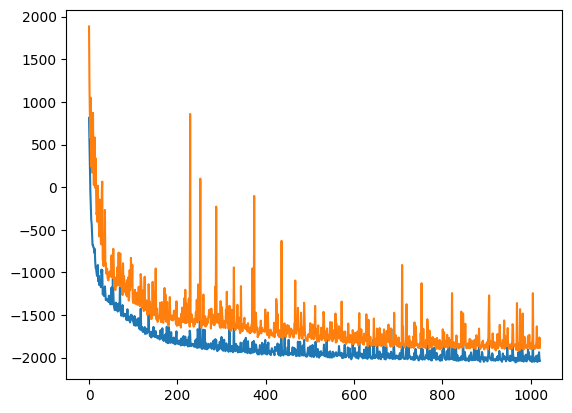

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 4.81597  validloss 4.99343±0.00000  bestvalidloss 4.99343  last_update 0
train: iter 1  trainloss 4.46352  validloss 4.59208±0.00000  bestvalidloss 4.59208  last_update 0
train: iter 2  trainloss 4.16188  validloss 4.26168±0.00000  bestvalidloss 4.26168  last_update 0
train: iter 3  trainloss 3.90544  validloss 4.00430±0.00000  bestvalidloss 4.00430  last_update 0
train: iter 4  trainloss 3.68808  validloss 3.76584±0.00000  bestvalidloss 3.76584  last_update 0
train: iter 5  trainloss 3.48101  validloss 3.55929±0.00000  bestvalidloss 3.55929  last_update 0
train: iter 6  trainloss 3.29934  validloss 3.36996±0.00000  bestvalidloss 3.36996  last_update 0
train: iter 7  trainloss 3.12175  validloss 3.19079±0.00000  bestvalidloss 3.19079  last_update 0
train: iter 8  trainloss 2.95441  validloss 3.03139±0.00000  bestvalidloss 3.03139  last_update 0
train: iter 9  trainloss 2.79840  validloss 2.86787±0.00000  bestvalidloss 2.86787  last_update 0
train: iter 10  trai

train: iter 85  trainloss -1.70205  validloss -1.61400±0.00000  bestvalidloss -1.67194  last_update 1
train: iter 86  trainloss -1.68232  validloss -1.71885±0.00000  bestvalidloss -1.71885  last_update 0
train: iter 87  trainloss -1.61882  validloss -1.62645±0.00000  bestvalidloss -1.71885  last_update 1
train: iter 88  trainloss -1.67122  validloss -1.69736±0.00000  bestvalidloss -1.71885  last_update 2
train: iter 89  trainloss -1.65179  validloss -1.59688±0.00000  bestvalidloss -1.71885  last_update 3
train: iter 90  trainloss -1.71994  validloss -1.69417±0.00000  bestvalidloss -1.71885  last_update 4
train: iter 91  trainloss -1.69232  validloss -1.68343±0.00000  bestvalidloss -1.71885  last_update 5
train: iter 92  trainloss -1.72304  validloss -1.74119±0.00000  bestvalidloss -1.74119  last_update 0
train: iter 93  trainloss -1.73122  validloss -1.81640±0.00000  bestvalidloss -1.81640  last_update 0
train: iter 94  trainloss -1.75767  validloss -1.78059±0.00000  bestvalidloss -1.8

train: iter 175  trainloss -1.80895  validloss -1.72303±0.00000  bestvalidloss -1.94763  last_update 14
train: iter 176  trainloss -1.71273  validloss -1.83152±0.00000  bestvalidloss -1.94763  last_update 15
train: iter 177  trainloss -1.71800  validloss -1.81213±0.00000  bestvalidloss -1.94763  last_update 16
train: iter 178  trainloss -1.76635  validloss -1.74906±0.00000  bestvalidloss -1.94763  last_update 17
train: iter 179  trainloss -1.82356  validloss -1.71633±0.00000  bestvalidloss -1.94763  last_update 18
train: iter 180  trainloss -1.78226  validloss -1.77090±0.00000  bestvalidloss -1.94763  last_update 19
train: iter 181  trainloss -1.83539  validloss -1.59981±0.00000  bestvalidloss -1.94763  last_update 20
train: iter 182  trainloss -1.80335  validloss -1.76162±0.00000  bestvalidloss -1.94763  last_update 21
train: iter 183  trainloss -1.84148  validloss -1.74962±0.00000  bestvalidloss -1.94763  last_update 22
train: iter 184  trainloss -1.81536  validloss -1.85534±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-1.1338, -2.2508, -4.0849, -5.1723], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 99.60615  validloss 97.17910±0.00000  bestvalidloss 97.17910  last_update 0
train: iter 1  trainloss 73.77340  validloss 77.14178±0.00000  bestvalidloss 77.14178  last_update 0
train: iter 2  trainloss 52.53975  validloss 52.95061±0.00000  bestvalidloss 52.95061  last_update 0
train: iter 3  trainloss 40.53590  validloss 38.92664±0.00000  bestvalidloss 38.92664  last_update 0
train: iter 4  trainloss 31.83669  validloss 30.17403±0.00000  bestvalidloss 30.17403  last_update 0
train: iter 5  trainloss 25.21159  validloss 23.64931±0.00000  bestvalidloss 23.64931  last_update 0
train: iter 6  trainloss 20.09101  validloss 18.63675±0.00000  bestvalidloss 18.63675  last_update 0
train: iter 7  trainloss 16.10031  validloss 15.08567±0.00000  bestvalidloss 15.08567  last_update 0
train: iter 8  trainloss 12.94270  validloss 12.14365±0.00000  bestvalidloss 12.14365  last_update 0
train: iter 9  trainloss 10.57237  validloss 10.04868±0.00000  bestvalidloss 10.04868  last

train: iter 84  trainloss 2.24855  validloss 4.12360±0.00000  bestvalidloss 3.52612  last_update 5
train: iter 85  trainloss 2.19160  validloss 3.74845±0.00000  bestvalidloss 3.52612  last_update 6
train: iter 86  trainloss 2.20589  validloss 3.92182±0.00000  bestvalidloss 3.52612  last_update 7
train: iter 87  trainloss 2.19791  validloss 3.96572±0.00000  bestvalidloss 3.52612  last_update 8
train: iter 88  trainloss 2.20155  validloss 3.81588±0.00000  bestvalidloss 3.52612  last_update 9
train: iter 89  trainloss 2.18505  validloss 3.70069±0.00000  bestvalidloss 3.52612  last_update 10
train: iter 90  trainloss 2.18081  validloss 3.71920±0.00000  bestvalidloss 3.52612  last_update 11
train: iter 91  trainloss 2.12499  validloss 3.90866±0.00000  bestvalidloss 3.52612  last_update 12
train: iter 92  trainloss 2.18921  validloss 4.24121±0.00000  bestvalidloss 3.52612  last_update 13
train: iter 93  trainloss 2.20923  validloss 3.61872±0.00000  bestvalidloss 3.52612  last_update 14
train

train: iter 168  trainloss 2.14827  validloss 3.79013±0.00000  bestvalidloss 3.33405  last_update 52
train: iter 169  trainloss 2.17306  validloss 3.98317±0.00000  bestvalidloss 3.33405  last_update 53
train: iter 170  trainloss 2.16673  validloss 3.87318±0.00000  bestvalidloss 3.33405  last_update 54
train: iter 171  trainloss 2.13887  validloss 3.88983±0.00000  bestvalidloss 3.33405  last_update 55
train: iter 172  trainloss 2.16848  validloss 3.79495±0.00000  bestvalidloss 3.33405  last_update 56
train: iter 173  trainloss 2.09272  validloss 3.74168±0.00000  bestvalidloss 3.33405  last_update 57
train: iter 174  trainloss 2.17369  validloss 3.76829±0.00000  bestvalidloss 3.33405  last_update 58
train: iter 175  trainloss 2.09235  validloss 3.98309±0.00000  bestvalidloss 3.33405  last_update 59
train: iter 176  trainloss 2.16613  validloss 3.93025±0.00000  bestvalidloss 3.33405  last_update 60
train: iter 177  trainloss 2.20983  validloss 3.70842±0.00000  bestvalidloss 3.33405  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-12.6418)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(3.9616)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.5428173481908225
tensor([1.3300])
